In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#data.describe()

In [2]:
data2 = pd.read_csv('https://openaq-data.s3.amazonaws.com/2018-04-06.csv')
data2.describe()

value       latitude      longitude
count  585438.000000  532969.000000  532969.000000
mean      105.033613      34.184246      22.745671
std      2343.220700      12.256093      42.024280
min     -9999.000000     -53.158295    -158.088593
25%         0.002700      31.757090      18.834639
50%         0.044500      32.178700      34.896092
75%         1.230000      36.179700      35.098936
max    183000.000000      78.906690     153.402400

In [3]:
data2.shape, len(data2)

((585438, 11), 585438)

In [4]:
data2.count()

location       585438
city           585438
country        585438
utc            585438
local          585438
parameter      585438
value          585438
unit           585438
latitude       532969
longitude      532969
attribution    585438
dtype: int64

In [5]:
timeit data2.shape

955 ns ± 22.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
timeit data2.count()

215 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
timeit len(data2)

677 ns ± 17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
data2.head()

location          city country                       utc  \
0        תחנה:ניידת6     צפון הנגב      IL  2018-04-06T10:00:00.000Z   
1  תחנה:אום אל קוטוף  תחנות ניידות      IL  2018-04-06T00:30:00.000Z   
2  תחנה:אום אל קוטוף  תחנות ניידות      IL  2018-04-06T01:30:00.000Z   
3  תחנה:אום אל קוטוף  תחנות ניידות      IL  2018-04-06T01:30:00.000Z   
4  תחנה:אום אל קוטוף  תחנות ניידות      IL  2018-04-06T01:15:00.000Z   

                       local parameter   value unit   latitude  longitude  \
0  2018-04-06T13:00:00+03:00        co  2.4000  ppm  31.248970  35.215970   
1  2018-04-06T03:30:00+03:00        o3  0.0289  ppm  31.987899  34.757384   
2  2018-04-06T04:30:00+03:00       so2  0.0012  ppm  31.987899  34.757384   
3  2018-04-06T04:30:00+03:00       no2  0.0093  ppm  31.987899  34.757384   
4  2018-04-06T04:15:00+03:00        o3  0.0284  ppm  31.987899  34.757384   

                                         attribution  
0  [{"name":"Israel Ministry of Environmental Pro...  
1  [{"name":"Israel Ministry of Environmental Pro...  
2  [{"name":"Israel Ministry of Environmental Pro...  
3  [{"name":"Israel Ministry of Environmental Pro...  
4  [{"name":"Israel Ministry of Environmental Pro...

In [9]:
data2["local"]= pd.to_datetime(data2["local"]);  data2["utc"]= pd.to_datetime(data2["utc"])
data2.describe(include = 'all')

location               city country                  utc  \
count               585438             585438  585438               585438   
unique                4279               1418      53                   96   
top     תחנה:עטרות א.תעשיה  מישור החוף הדרומי      IL  2018-04-06 03:00:00   
freq                  4329              43739  403131                13464   
first                  NaN                NaN     NaN  2018-04-06 00:00:00   
last                   NaN                NaN     NaN  2018-04-06 23:45:00   
mean                   NaN                NaN     NaN                  NaN   
std                    NaN                NaN     NaN                  NaN   
min                    NaN                NaN     NaN                  NaN   
25%                    NaN                NaN     NaN                  NaN   
50%                    NaN                NaN     NaN                  NaN   
75%                    NaN                NaN     NaN                  NaN   
max                    NaN                NaN     NaN                  NaN   

                      local parameter          value    unit       latitude  \
count                585438    585438  585438.000000  585438  532969.000000   
unique                   96         7            NaN       2            NaN   
top     2018-04-06 03:00:00       no2            NaN     ppm            NaN   
freq                  13464    154327            NaN  434896            NaN   
first   2018-04-06 00:00:00       NaN            NaN     NaN            NaN   
last    2018-04-06 23:45:00       NaN            NaN     NaN            NaN   
mean                    NaN       NaN     105.033613     NaN      34.184246   
std                     NaN       NaN    2343.220700     NaN      12.256093   
min                     NaN       NaN   -9999.000000     NaN     -53.158295   
25%                     NaN       NaN       0.002700     NaN      31.757090   
50%                     NaN       NaN       0.044500     NaN      32.178700   
75%                     NaN       NaN       1.230000     NaN      36.179700   
max                     NaN       NaN  183000.000000     NaN      78.906690   

            longitude                                        attribution  
count   532969.000000                                             585438  
unique            NaN                                                208  
top               NaN  [{"name":"Israel Ministry of Environmental Pro...  
freq              NaN                                             403131  
first             NaN                                                NaN  
last              NaN                                                NaN  
mean        22.745671                                                NaN  
std         42.024280                                                NaN  
min       -158.088593                                                NaN  
25%         18.834639                                                NaN  
50%         34.896092                                                NaN  
75%         35.098936                                                NaN  
max        153.402400                                                NaN

In [10]:
data2['country'].unique()

array(['IL', 'IE', 'IN', 'PT', 'FR', 'ZA', 'AU', 'CL', 'DK', 'CO', 'SE',
       'MN', 'TR', 'CN', 'SI', 'PE', 'BA', 'VN', 'ID', 'KW', 'XK', 'BD',
       'BH', 'HK', 'GB', 'ET', 'NO', 'TH', 'LK', 'NP', 'UG', 'AE', 'NL',
       'US', 'CA', 'MX', 'ES', 'CH', 'BE', 'GI', 'MK', 'LT', 'HR', 'MT',
       'LV', 'HU', 'FI', 'AD', 'SK', 'CZ', 'RS', 'LU', 'DE'], dtype=object)

In [11]:
# We want to EDA historical data from Portugal, Serbia, Italy and the Netherlands

In [12]:
ptData = data2.loc[data2["country"] == "PT"]
len(ptData)

4009

In [13]:
bmData = data2.loc[data2["country"].isin(["PT","RS","IT","NL"])]
len(bmData)

7867

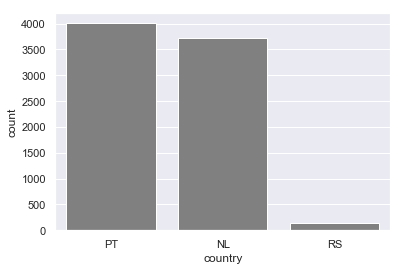

In [14]:
import seaborn as sns
sns.set()
sns.countplot(bmData['country'], color='gray')

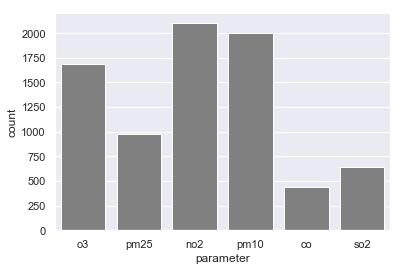

In [15]:
sns.countplot(bmData['parameter'], color='gray')

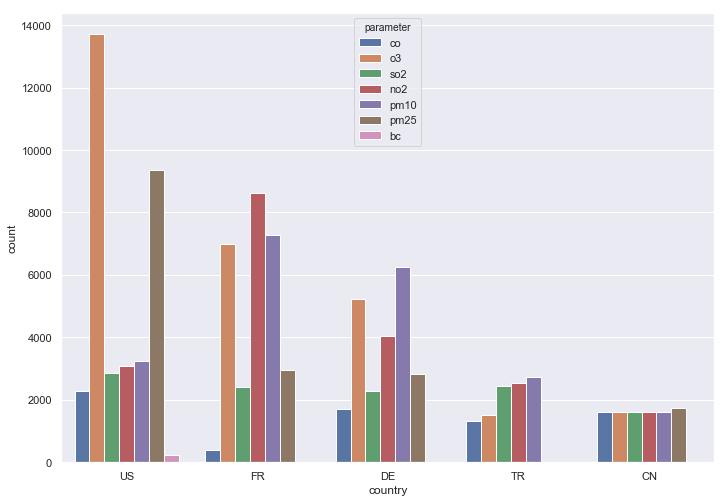

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='country', hue="parameter",data=data2, order=data2["country"].value_counts().keys()[1:6])

In [18]:
#!pip install pandas_profiling
import pandas_profiling

In [19]:
data2.profile_report()

### Try it yourself

Plot ts value for each parameter. Check meaning of negative concentrations?

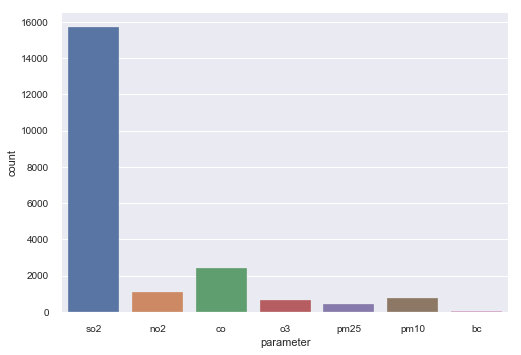

In [22]:
sns.countplot(x='parameter',data=data2[data2["value"]==0])

In [ ]:
# Homework 2: Analyse last 90 days
# Add info on streaming data
#data = pd.read_csv('https://openaq-data.s3.amazonaws.com/2018-04-06.csv', iterator=True, chunksize=10000)